# FASE 1 - DATA STORAGE 

## IMPORT DATASETS

In [173]:
%pip install -r requirements.txt ;

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd;
import numpy as np 
import pycountry as pc
from pyspark.sql import SparkSession

import matplotlib.pyplot as plt
import seaborn as sns


from couchbase.auth import PasswordAuthenticator
from couchbase.cluster import Cluster
from couchbase.options import ClusterOptions, QueryOptions
from couchbase.auth import PasswordAuthenticator
from couchbase.cluster import Cluster
from couchbase.options import ClusterOptions, QueryOptions
from couchbase.bucket import Bucket
from couchbase.management.buckets import CreateBucketSettings

import os
from dotenv import load_dotenv
from datetime import datetime 
from datetime import timedelta
import time
import requests

### Couchbase db setup
load_dotenv();

In [2]:
#DATASETS ESCOLHIDOS

dfLabor = pd.read_csv('datasets/world_labor_productivity.csv', delimiter=',')
#To change for the original dataset
dfSalary = pd.read_csv('datasets/world_annual_wage.csv', delimiter=',')
dfExchangeRates = pd.read_csv('datasets/exchange_rates.csv', delimiter=',')
dfMental=pd.read_csv('datasets/mental_illness.csv', delimiter=',')
dfCost = pd.read_csv('datasets/cost_of_living.csv', delimiter=',')

In [3]:
dfLabor

,Entity,Code,Year,Productivity: output per hour worked
0,Argentina,ARG,1972,5.770799
1,Argentina,ARG,1973,6.049992
2,Argentina,ARG,1974,6.123540
3,Argentina,ARG,1975,6.015602
4,Argentina,ARG,1976,6.029272
...,...,...,...,...
3452,Vietnam,VNM,2015,4.946606
3453,Vietnam,VNM,2016,5.156925
3454,Vietnam,VNM,2017,5.652919
3455,Vietnam,VNM,2018,5.982665


In [4]:
dfMental

,Entity,Code,Year,"DALYs from depressive disorders per 100,000 people in, both sexes aged age-standardized","DALYs from schizophrenia per 100,000 people in, both sexes aged age-standardized","DALYs from bipolar disorder per 100,000 people in, both sexes aged age-standardized","DALYs from eating disorders per 100,000 people in, both sexes aged age-standardized","DALYs from anxiety disorders per 100,000 people in, both sexes aged age-standardized"
0,Afghanistan,AFG,1990,895.22565,138.248250,147.64412,26.471115,440.33000
1,Afghanistan,AFG,1991,893.88434,137.761220,147.56696,25.548681,439.47202
2,Afghanistan,AFG,1992,892.34973,137.080300,147.13086,24.637949,437.60718
3,Afghanistan,AFG,1993,891.51587,136.486020,146.78812,23.863169,436.69104
4,Afghanistan,AFG,1994,891.39160,136.183230,146.58481,23.189074,436.76800
...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,546.46204,127.108720,115.32073,20.423056,302.20868
6836,Zimbabwe,ZWE,2016,547.27765,127.142105,114.98700,20.647228,302.68216
6837,Zimbabwe,ZWE,2017,547.62270,127.465050,115.32798,20.791725,302.88626
6838,Zimbabwe,ZWE,2018,546.57184,127.681210,115.42796,20.916480,301.58250


In [5]:
dfSalary

,COUNTRY,Country,SERIES,Series,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,CPNCU,Current prices in NCU,2000,2000,AUD,Australian Dollar,0,Units,NaN,NaN,46246.868731,NaN,NaN
1,AUS,Australia,CPNCU,Current prices in NCU,2001,2001,AUD,Australian Dollar,0,Units,NaN,NaN,48315.982391,NaN,NaN
2,AUS,Australia,CPNCU,Current prices in NCU,2002,2002,AUD,Australian Dollar,0,Units,NaN,NaN,50052.758102,NaN,NaN
3,AUS,Australia,CPNCU,Current prices in NCU,2003,2003,AUD,Australian Dollar,0,Units,NaN,NaN,51798.586644,NaN,NaN
4,AUS,Australia,CPNCU,Current prices in NCU,2004,2004,AUD,Australian Dollar,0,Units,NaN,NaN,54199.402711,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604,CRI,Costa Rica,USDPPP,In 2022 constant prices at 2022 USD PPPs,2017,2017,NaN,NaN,0,Units,NaN,NaN,27020.000000,NaN,NaN
2605,CRI,Costa Rica,USDPPP,In 2022 constant prices at 2022 USD PPPs,2018,2018,NaN,NaN,0,Units,NaN,NaN,27709.000000,NaN,NaN
2606,CRI,Costa Rica,USDPPP,In 2022 constant prices at 2022 USD PPPs,2019,2019,NaN,NaN,0,Units,NaN,NaN,28524.000000,NaN,NaN
2607,CRI,Costa Rica,USDPPP,In 2022 constant prices at 2022 USD PPPs,2020,2020,NaN,NaN,0,Units,NaN,NaN,31341.000000,NaN,NaN


In [6]:
dfCost

,Date,Country,Cost of Living,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,2023,Bermuda,141.8,96.3,120.0,143.3,142.0,79.5
1,2023,Switzerland,114.2,50.2,83.5,113.9,109.5,118.7
2,2023,Cayman Islands,103.4,75.7,90.1,96.4,92.4,76.7
3,2023,Bahamas,90.9,39.6,66.3,74.1,94.8,43.2
4,2023,Barbados,88.8,21.2,56.4,80.1,82.7,36.8
...,...,...,...,...,...,...,...,...
1626,2009,Bolivia,46.7,21.8,36.8,27.1,37.2,32.5
1627,2009,China,43.5,25.1,36.2,58.4,35.2,35.0
1628,2009,Thailand,39.9,24.5,33.8,53.3,25.3,33.4
1629,2009,India,38.5,10.5,27.4,34.0,29.5,41.4


## TRATAMENTO

In [7]:
print(dfSalary.columns)

Index(['COUNTRY', 'Country', 'SERIES', 'Series', 'TIME', 'Time', 'Unit Code',
       'Unit', 'PowerCode Code', 'PowerCode', 'Reference Period Code',
       'Reference Period', 'Value', 'Flag Codes', 'Flags'],
      dtype='object')


Como é possível observar, o dfSalary tem a feature 'Year' como 'Time' e a feature 'Entity' como 'Country'. De forma a uniformizar e poder fazer um merge correto, decidimos renomear as colunas.
É possível verificar que tem algumas colunas em duplicado pelo que demos drop delas

In [8]:
dfMental.rename(columns={'Entity':'Country'}, inplace=True)
dfMental.rename(columns={'DALYs from depressive disorders per 100,000 people in, both sexes aged age-standardized':'DALYs from depressive disorders per 100,000 people'}, inplace=True)
dfMental.rename(columns={'DALYs from bipolar disorder per 100,000 people in, both sexes aged age-standardized':'DALYs from bipolar disorder per 100,000 people'}, inplace=True)
dfMental.rename(columns={'DALYs from schizophrenia per 100,000 people in, both sexes aged age-standardized':'DALYs from schizophrenia per 100,000 people'}, inplace=True)
dfMental.rename(columns={'DALYs from eating disorders per 100,000 people in, both sexes aged age-standardized':'DALYs from eating disorders per 100,000 people'}, inplace=True)
dfMental.rename(columns={'DALYs from anxiety disorders per 100,000 people in, both sexes aged age-standardized':'DALYs from anxiety disorders per 100,000 people'}, inplace=True)

In [9]:
dfLabor.rename(columns={"Entity": "Country"}, inplace=True)
dfLabor.drop(columns=['Code'], inplace=True)
dfLabor.rename(columns={'Productivity: output per hour worked':'Productivity'}, inplace=True)

In [10]:
dfSalary.drop(columns=[ 'COUNTRY' , "Flag Codes", "Flags", "SERIES", "Series", "Unit", "PowerCode", "PowerCode Code","Reference Period Code", "Reference Period"], inplace=True)
dfSalary.rename(columns={'Value':'Salary'}, inplace=True)
dfSalary.rename(columns={'PowerCode':'Unit Code'}, inplace=True)
dfSalary.rename(columns={'Time':'Year'}, inplace=True)
dfSalary.drop(columns=[ 'TIME' ], inplace=True)

#Drop the countries without unit code
countriesWithoutUnitCode = dfSalary[dfSalary['Unit Code'].isna()]["Country"].unique()
dfSalary = dfSalary[~dfSalary['Country'].isin(countriesWithoutUnitCode)]
dfSalary = dfSalary.dropna(subset=['Year'])
dfSalary = dfSalary.dropna(subset=['Salary'])
dfSalary = dfSalary.dropna(subset=['Unit Code'])
dfSalary = dfSalary.dropna(subset=['Country'])

In [11]:
dfCost.rename(columns={'Date':'Year'}, inplace=True)
dfCost.rename(columns={'Cost of Living':'CoL'}, inplace=True)

In [12]:
#Lets list all the collumn names
print("Labor dataset collumns:  "+str(dfLabor.columns))
print("Salary dataset collumns: "+str(dfSalary.columns))
print("Mental Illness dataset collumns: "+str(dfMental.columns))
print("Cost of Living dataset collumns: "+str(dfCost.columns))

Labor dataset collumns:  Index(['Country', 'Year', 'Productivity'], dtype='object')
Salary dataset collumns: Index(['Country', 'Year', 'Unit Code', 'Salary'], dtype='object')
Mental Illness dataset collumns: Index(['Country', 'Code', 'Year',
       'DALYs from depressive disorders per 100,000 people',
       'DALYs from schizophrenia per 100,000 people',
       'DALYs from bipolar disorder per 100,000 people',
       'DALYs from eating disorders per 100,000 people',
       'DALYs from anxiety disorders per 100,000 people'],
      dtype='object')
Cost of Living dataset collumns: Index(['Year', 'Country', 'CoL', 'Rent Index',
       'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index'],
      dtype='object')


In [13]:
#Lets check the dates of the datasets
print("Labor dataset dates:  "+str(sorted(dfLabor['Year'].unique())))
print("Salary dataset dates: "+str(sorted(dfSalary['Year'].unique())))
print("Mental Illness dataset dates: "+str(sorted(dfMental['Year'].unique())))
print("Cost of Living dataset dates: "+str(sorted(dfCost['Year'].unique())))


Labor dataset dates:  [1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
Salary dataset dates: [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
Mental Illness dataset dates: [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
Cost of Living dataset dates: [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [14]:
def getExchangeRates(self):
    API_KEY = os.getenv("EXAAPI_KEY")

    # Lets use the Unit Code to get the exchange rates for each country
    # Lets collect all the Unit Codes for the countries per year
    unitCodesPerYear = {}
    for year in dfSalary['Year'].unique():
        unitCodesPerYear[year] = dfSalary[dfSalary['Year'] == year]['Unit Code'].unique().tolist()


    #Lets create a new dataset to store this information
    dfExchangeRates = pd.DataFrame(columns=['Year', 'Unit Code', 'Exchange Rate'])

    for year in unitCodesPerYear:
        
        unitCodes = ",".join([unit for unit in unitCodesPerYear[year] if str(unit)!="nan"])
        apiUrl = f"http://api.exchangeratesapi.io/v1/{str(year)}-12-12?access_key={API_KEY}&symbols=USD,{unitCodes}"
        response = requests.get(apiUrl)
        if response.status_code !=200:
            break
        exchangeRates = response.json()
        
        for index, row in dfSalary[dfSalary['Year'] == year].iterrows():
            unitCode = row['Unit Code']
            if unitCode in exchangeRates['rates']:
                exchangeRate = exchangeRates['rates'][unitCode]
                dfExchangeRates = pd.concat([dfExchangeRates, pd.DataFrame({'Year': [year], 'Unit Code': [unitCode], 'Exchange Rate': [exchangeRate]})], ignore_index=True)
            else:
                latest_exchange_rate = None
                for code, rate in exchangeRates['rates'].items():
                    if code in unitCodesPerYear[year]:
                        latest_exchange_rate = rate
                        break
                if latest_exchange_rate is not None:
                    dfExchangeRates = pd.concat([dfExchangeRates, pd.DataFrame({'Year': [year], 'Unit Code': [unitCode], 'Exchange Rate': [latest_exchange_rate]})], ignore_index=True)
    
    #Lets save the dataframe with the exchange rates 
    dfExchangeRates.to_csv('datasets/exchange_rates.csv', index=False)
    print("Exchanged successfully")

In [15]:
def exchange():
    for row in dfSalary.iterrows():
        index, row = row
        entity = row['Country']
        unitCode = row['Unit Code']
        salary = row['Salary']
        year = row['Year']
        exchangeRate = dfExchangeRates[(dfExchangeRates['Year'] == year) & (dfExchangeRates['Unit Code'] == unitCode)]['Exchange Rate']
        if len(exchangeRate) > 0:
            exchangeRate = exchangeRate.iloc[0]
            salaryInUSD = salary / exchangeRate
            dfSalary.at[index, 'Salary'] = salaryInUSD
            dfSalary.at[index, 'Exchange Rate'] = float(exchangeRate)
        else:
            print(f"Exchange rate not found for {entity} in {year}")

exchange()

In [16]:
dfSalary

,Country,Year,Unit Code,Salary,Exchange Rate
0,Australia,2000,AUD,28513.655872,1.621920
1,Australia,2001,AUD,28017.142438,1.724515
2,Australia,2002,AUD,27800.292208,1.800440
3,Australia,2003,AUD,31325.628295,1.653553
4,Australia,2004,AUD,30771.302385,1.761362
...,...,...,...,...,...
2430,Lithuania,2018,USD,34752.056160,1.137314
2431,Lithuania,2019,USD,37584.292214,1.118579
2432,Lithuania,2020,USD,36517.058027,1.211160
2433,Lithuania,2021,USD,41582.152510,1.131145


In [17]:
dfCost

,Year,Country,CoL,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,2023,Bermuda,141.8,96.3,120.0,143.3,142.0,79.5
1,2023,Switzerland,114.2,50.2,83.5,113.9,109.5,118.7
2,2023,Cayman Islands,103.4,75.7,90.1,96.4,92.4,76.7
3,2023,Bahamas,90.9,39.6,66.3,74.1,94.8,43.2
4,2023,Barbados,88.8,21.2,56.4,80.1,82.7,36.8
...,...,...,...,...,...,...,...,...
1626,2009,Bolivia,46.7,21.8,36.8,27.1,37.2,32.5
1627,2009,China,43.5,25.1,36.2,58.4,35.2,35.0
1628,2009,Thailand,39.9,24.5,33.8,53.3,25.3,33.4
1629,2009,India,38.5,10.5,27.4,34.0,29.5,41.4


In [18]:
print(dfSalary.columns)
print(dfLabor.columns) 
print(dfMental.columns) 
print(dfCost.columns)

Index(['Country', 'Year', 'Unit Code', 'Salary', 'Exchange Rate'], dtype='object')
Index(['Country', 'Year', 'Productivity'], dtype='object')
Index(['Country', 'Code', 'Year',
       'DALYs from depressive disorders per 100,000 people',
       'DALYs from schizophrenia per 100,000 people',
       'DALYs from bipolar disorder per 100,000 people',
       'DALYs from eating disorders per 100,000 people',
       'DALYs from anxiety disorders per 100,000 people'],
      dtype='object')
Index(['Year', 'Country', 'CoL', 'Rent Index',
       'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index'],
      dtype='object')


In [19]:
print("Labor dataset dates:  "+str(sorted(dfLabor['Year'].unique())))
print("Salary dataset dates: "+str(sorted(dfSalary['Year'].unique())))
print("Mental Illness dataset dates: "+str(sorted(dfMental['Year'].unique())))
print("Cost of Living dataset dates: "+str(sorted(dfCost['Year'].unique())))


Labor dataset dates:  [1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
Salary dataset dates: [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
Mental Illness dataset dates: [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
Cost of Living dataset dates: [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


## MERGE THE DATASETS USING PANDAS

In [20]:
merged_df=None
def mergeDataSetsPandas(runs=1):
    timeDelta = []
    for _ in range(runs):
        merged_df = None
        start_time = time.time()
        merged_df = pd.merge(dfCost, dfLabor, on=['Country', 'Year'], how='inner')
        merged_df = pd.merge(merged_df, dfMental, on=['Country', 'Year'], how='inner')
        merged_df = pd.merge(merged_df, dfSalary, on=['Country', 'Year'], how='inner')
        end_time = time.time()
        elapsed_time = end_time - start_time

        print("Elapsed time:", elapsed_time, "seconds")
        timeDelta.append(elapsed_time)
    print("Average time:", sum(timeDelta)/len(timeDelta))
    return timeDelta

merged_df = pd.merge(dfCost, dfLabor, on=['Country', 'Year'], how='inner')
merged_df = pd.merge(merged_df, dfMental, on=['Country', 'Year'], how='inner')
merged_df = pd.merge(merged_df, dfSalary, on=['Country', 'Year'], how='inner')

mergeDataSetsPandas(1)

Elapsed time: 0.005774021148681641 seconds
Average time: 0.005774021148681641


[0.005774021148681641]

In [21]:
merged_df

,Year,Country,CoL,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Productivity,Code,"DALYs from depressive disorders per 100,000 people","DALYs from schizophrenia per 100,000 people","DALYs from bipolar disorder per 100,000 people","DALYs from eating disorders per 100,000 people","DALYs from anxiety disorders per 100,000 people",Unit Code,Salary,Exchange Rate
0,2019,Switzerland,121.2,50.2,87.1,120.8,123.1,129.7,82.918655,CHE,635.31090,178.67760,202.48970,107.115810,650.54030,CHF,80501.214284,1.101884
1,2019,Switzerland,121.2,50.2,87.1,120.8,123.1,129.7,82.918655,CHE,635.31090,178.67760,202.48970,107.115810,650.54030,CHF,82253.667355,1.101884
2,2019,Switzerland,121.2,50.2,87.1,120.8,123.1,129.7,82.918655,CHE,635.31090,178.67760,202.48970,107.115810,650.54030,USD,63642.353379,1.118579
3,2019,Iceland,101.9,48.3,76.1,92.1,111.8,91.8,64.244220,ISL,485.75662,177.96698,195.80510,96.615060,489.77250,ISK,80314.306626,136.701286
4,2019,Iceland,101.9,48.3,76.1,92.1,111.8,91.8,64.244220,ISL,485.75662,177.96698,195.80510,96.615060,489.77250,ISK,92554.279263,136.701286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,2009,Mexico,54.2,22.4,41.6,40.0,48.7,42.9,19.709696,MEX,610.59094,181.27681,198.06451,50.877518,352.22714,MXN,11836.286902,18.960169
998,2009,Mexico,54.2,22.4,41.6,40.0,48.7,42.9,19.709696,MEX,610.59094,181.27681,198.06451,50.877518,352.22714,USD,12804.494850,1.468703
999,2009,Poland,53.5,34.8,46.1,40.7,44.6,26.9,25.316256,POL,317.68677,187.14354,119.24043,35.298910,298.42096,PLN,9321.037129,4.126043
1000,2009,Poland,53.5,34.8,46.1,40.7,44.6,26.9,25.316256,POL,317.68677,187.14354,119.24043,35.298910,298.42096,PLN,13431.270590,4.126043


## MERGE THE DATASETS USING PYSPARK 

In [22]:
from pyspark.sql import SparkSession

def mergeDataSetsSpark(runs=1):
    timeDelta = []
    for i in range(runs):
        start_time = time.time()
        # Initialize SparkSession
        spark = SparkSession.builder \
            .appName("Merge Datasets") \
            .getOrCreate()

        merged_df = dfSalary.merge(dfCost, on=['Year', 'Country'], how='inner')
        merged_df = merged_df.merge(dfMental, on=['Year', 'Country'], how='inner')
        merged_df = merged_df.merge(dfLabor, on=['Year', 'Country'], how='inner')

        # Stop SparkSession
        spark.stop()

        end_time = time.time()
        elapsed_time = end_time - start_time

        print("Elapsed time:", elapsed_time, "seconds")
        timeDelta.append(elapsed_time)
    print("Average time:", sum(timeDelta)/len(timeDelta))
    return timeDelta

mergeDataSetsSpark()

24/04/04 09:00:47 WARN Utils: Your hostname, rkeats-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 172.26.114.193 instead (on interface en0)
24/04/04 09:00:47 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/04/04 09:00:47 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Elapsed time: 2.804630994796753 seconds
Average time: 2.804630994796753


[2.804630994796753]

# Now that we have both approaches, merging using pandas and pySpark we will benchmark them

Elapsed time: 0.009055852890014648 seconds
Elapsed time: 0.005311012268066406 seconds
Elapsed time: 0.007090091705322266 seconds
Elapsed time: 0.007194042205810547 seconds
Elapsed time: 0.0059659481048583984 seconds
Average time: 0.006923389434814453
Elapsed time: 0.5417559146881104 seconds
Elapsed time: 0.5472629070281982 seconds
Elapsed time: 0.5460491180419922 seconds
Elapsed time: 0.5550210475921631 seconds
Elapsed time: 0.5445749759674072 seconds
Average time: 0.5469327926635742
Time Elapsed for Pandas: 0.009055852890014648 seconds
Time Elapsed for Pandas: 0.005311012268066406 seconds
Time Elapsed for Pandas: 0.007090091705322266 seconds
Time Elapsed for Pandas: 0.007194042205810547 seconds
Time Elapsed for Pandas: 0.0059659481048583984 seconds
Time Elapsed for PySpark: 0.5417559146881104 seconds
Time Elapsed for PySpark: 0.5472629070281982 seconds
Time Elapsed for PySpark: 0.5460491180419922 seconds
Time Elapsed for PySpark: 0.5550210475921631 seconds
Time Elapsed for PySpark: 0.

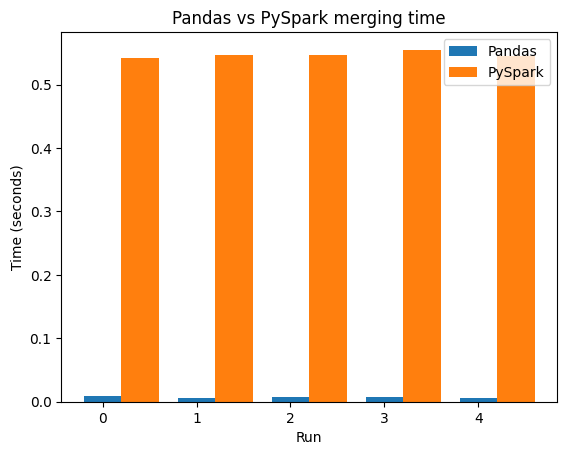

In [196]:
pandasTimeDelta = mergeDataSetsPandas(5)
sparkTimeDelta = mergeDataSetsSpark(5)

for i in pandasTimeDelta:
    print(f"Time Elapsed for Pandas: {i} seconds")
for i in sparkTimeDelta:
    print(f"Time Elapsed for PySpark: {i} seconds")

print(f"Average time for Pandas: {sum(pandasTimeDelta)/len(pandasTimeDelta)} seconds")
print(f"Average time for PySpark: {sum(sparkTimeDelta)/len(sparkTimeDelta)} seconds")

bar_width = 0.4  

# Plotting
plt.bar(range(5), pandasTimeDelta, width=bar_width, label='Pandas')
plt.bar([x + bar_width for x in range(5)], sparkTimeDelta, width=bar_width, label='PySpark')
plt.legend()
plt.title("Pandas vs PySpark merging time")
plt.xlabel("Run")
plt.ylabel("Time (seconds)")
plt.show()


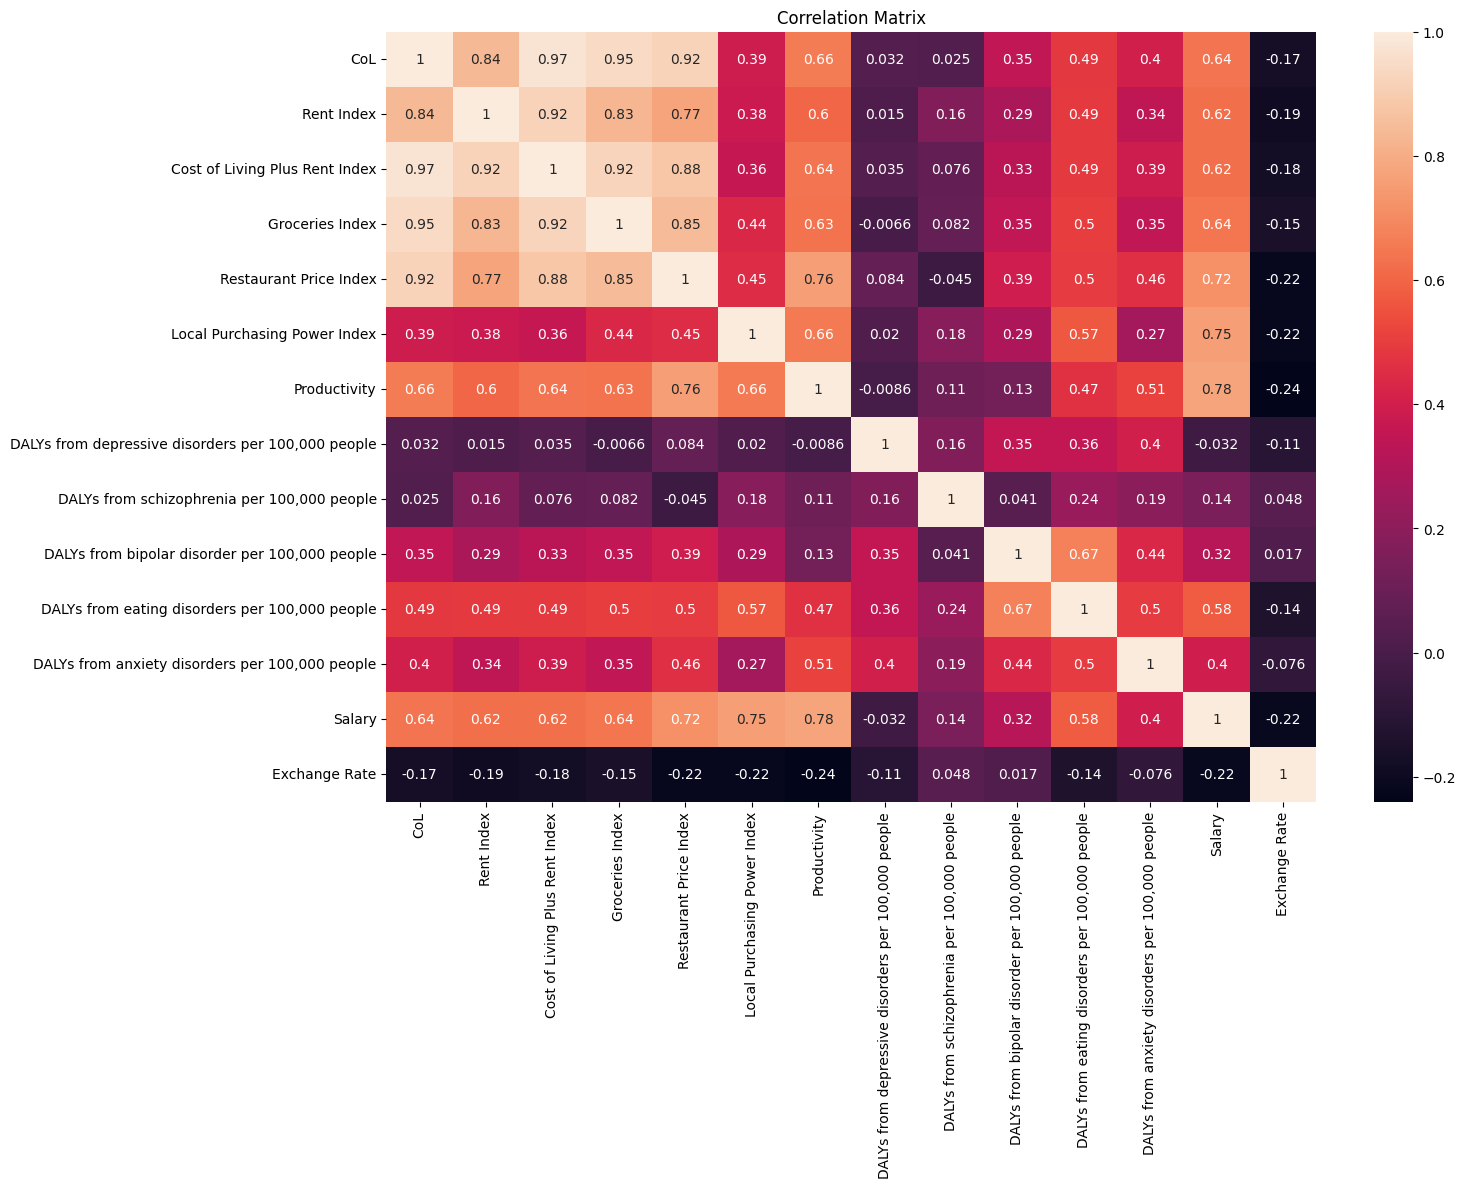

In [217]:
#Lets drop the collumns that wont add value to the analysis
correlationDF = merged_df.drop(columns=['Year', 'Country', 'Code', "Unit Code"])
#Lets apply a correlation matrix to determine if any data is correlated
correlation_matrix = correlationDF.corr()
#Plot the correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

# Now we are going to the next step in the pipeline that is the storage
We will use Couchbase db and we will benchmark what would be the better option, storing the documents(each dataset) individually or merge them by running the same queries on both options

In [25]:

couchbaseUsername, couchbasePassword = os.getenv('COUCHBASE_USERNAME'), os.getenv('COUCHBASE_PASSWORD')


# get a reference to our cluster
auth = PasswordAuthenticator(couchbaseUsername, couchbasePassword)
cluster = Cluster.connect('couchbase://127.0.0.1', ClusterOptions(auth))


#Datasets structure:
#[(bucket_name, dataset)]
def db_populator(datasets, options=None):
    for i in datasets:
        bucketName, dataset = i
        if options!=None:
            bucketSettings = CreateBucketSettings(name=options["name"], 
                                                bucket_type=options["bucket_type"], 
                                                ram_quota_mb=options["ram_quota_mb"], 
                                                max_expiry=options["max_expiry"], 
                                                compression_mode=options["compression_mode"], 
                                                conflict_resolution_type=options["conflict_resolution_type"])
        else:
            bucketSettings = CreateBucketSettings(name=bucketName, 
                                                bucket_type="couchbase", 
                                                ram_quota_mb=100, 
                                                max_expiry=0, 
                                                compression_mode="passive", 
                                                conflict_resolution_type="seqno")
            
        
        print(f"Populating {bucketName} with {len(dataset)} documents")
        #Create the bucket to store the files
        try:
             
            cluster.buckets().create_bucket(bucketSettings, name=f'{bucketName}')
            print('Bucket created')
            cluster.wait_until_ready(timedelta(seconds=20))

        except Exception as e:
            if "Bucket with given name already exists" in str(e):
                pass
        
        time.sleep(1)
        #Lets create a new collection to store the data
        bucket = cluster.bucket(bucketName)
        collection = bucket.default_collection()

        #Lets store the data in the collection
        #Lets store the data in the collection
        #Lets get the last id in the bucket
        k=0
        for row in dataset.iterrows():
            data = row[1].to_dict()
            #Rever se este id é necessário visto que depois corremos o create_primary_index
            data["_id"] = f"{k}"
            collection.upsert(str(k), data)
            k+=1

        print('Data stored')
        #Lets create the index for the data
        try:
            cluster.query_indexes().create_primary_index(bucketName)
            print('Index created')
        except Exception as e:
            if "already exists" in str(e):
                pass    


In [27]:
def benchmarkQueries(query):
    timeBeforeQuery = datetime.now()
    result = cluster.query(query)
    for _ in result:
        pass
    timeAfterQuery = datetime.now()
    return timeAfterQuery-timeBeforeQuery

def runBenchmarks(runs = 1):
    mergedTimeDelta = []
    nonMergedTimeDelta = []
    for _ in range(runs):
        runTimesMergedDataset = []
        runTimesUnmergedDataset = []
        #Lets make some queries to the data
        purchasePowerMentalHealthProductivity = f"""
        SELECT c.`Country`,
            c.`Local Purchasing Power Index`,
            c.`Year`,
            c.`DALYs from depressive disorders per 100,000 people`,
            c.`DALYs from schizophrenia per 100,000 people`,
            c.`DALYs from bipolar disorder per 100,000 people`,
            c.`DALYs from eating disorders per 100,000 people`,
            c.`DALYs from anxiety disorders per 100,000 people`,
            c.`Productivity`
        FROM `world_data` c
        ORDER BY c.`Country`,
                c.`Year`, c.`Productivity` DESC
        LIMIT 10;
        """

        timeElapsed = benchmarkQueries(purchasePowerMentalHealthProductivity)
        # print(f"Time to run query in the merged dataset: {(timeAfterQuery-timeBeforeQuery)*1000} ms")
        print(f"Time to run query in the merged dataset: {(timeElapsed).total_seconds()} seconds")
        runTimesMergedDataset.append((timeElapsed).total_seconds())

        purchasePowerMentalHealthProductivityMB = f"""
        SELECT c.`Country`,
            c.`Local Purchasing Power Index`,
            c.`Year`,
            m.`DALYs from depressive disorders per 100,000 people`,
            m.`DALYs from schizophrenia per 100,000 people`,
            m.`DALYs from bipolar disorder per 100,000 people`,
            m.`DALYs from eating disorders per 100,000 people`,
            m.`DALYs from anxiety disorders per 100,000 people`,
            w.`Productivity`
        FROM `mental_illness` m
        INNER JOIN `cost_of_living` c ON c.`Country` = m.`Country`
            AND c.`Year`= m.`Year`
        INNER JOIN `world_labor_productivity` w ON w.`Country` = m.`Country`
            AND w.`Year`= m.`Year`
        ORDER BY m.`Country`,
                m.`Year`,
                w.`Productivity` DESC
        LIMIT 10;
        """

        
        elapsedTime = benchmarkQueries(purchasePowerMentalHealthProductivityMB).total_seconds()
        print(f"Time to run query: {elapsedTime} seconds")
        runTimesUnmergedDataset.append(elapsedTime)
        
        
        # print(f"Time to run query in the datasets: {(timeAfterQueryMB-timeBeforeQueryMB)*1000} ms")
        # print(f"Time comparison between the merged and the not merged dataset: {((timeAfterQuery-timeBeforeQuery)-(timeAfterQueryMB-timeBeforeQueryMB))*1000} ms")
        # print("---------------------------------------")
        print(f"Time to run query in the unmerged dataset: {elapsedTime} seconds")

        correlationPurchasingPowerMentalHealthMB = f"""
            SELECT c.Country,
                c.`Local Purchasing Power Index`,
                (m.`DALYs from depressive disorders per 100,000 people` + m.`DALYs from schizophrenia per 100,000 people` + m.`DALYs from bipolar disorder per 100,000 people` + m.`DALYs from eating disorders per 100,000 people` + m.`DALYs from anxiety disorders per 100,000 people`) AS Total_Mental_Health_DALYs
            FROM cost_of_living c
            INNER JOIN `mental_illness` m ON c.`Country` = m.`Country`
                AND c.`Year` = m.`Year`
            ORDER BY c.`Year`,
                    c.`Country`
            """

        timeElapsed = benchmarkQueries(correlationPurchasingPowerMentalHealthMB).total_seconds()
        # print(f"Time to run correlation between purchasing power and mental health query in the unmerged dataset: {(timeAfterQuery-timeBeforeQuery)*1000} ms")
        runTimesUnmergedDataset.append(timeElapsed)

        correlationPurchasingPowerMentalHealth = f"""
        SELECT m.Country,
            m.`Local Purchasing Power Index`,
            (m.`DALYs from depressive disorders per 100,000 people` + m.`DALYs from schizophrenia per 100,000 people` + m.`DALYs from bipolar disorder per 100,000 people` + m.`DALYs from eating disorders per 100,000 people` + m.`DALYs from anxiety disorders per 100,000 people`) AS Total_Mental_Health_DALYs
        FROM world_data m
        ORDER BY m.`Year`,
                m.`Country`
            """

        timeElapsed = benchmarkQueries(correlationPurchasingPowerMentalHealth).total_seconds()
        # print(f"Time to run correlation between purchasing power and mental health query in the merged dataset: {(timeAfterQueryMB-timeBeforeQueryMB)*1000} ms")
        # print(f"Time comparison between the merged and the not merged dataset: {((timeAfterQuery-timeBeforeQuery)-(timeAfterQueryMB-timeBeforeQueryMB))*1000} ms")
        # print("---------------------------------------")
        runTimesMergedDataset.append(timeElapsed)

        correlationcountryWithHighestNOfDALLY2LocalPurchasingPower = f"""
            WITH total_dalys AS (
                SELECT Country,
                    SUM(`DALYs from depressive disorders per 100,000 people` + `DALYs from schizophrenia per 100,000 people` + `DALYs from bipolar disorder per 100,000 people` + `DALYs from eating disorders per 100,000 people` + `DALYs from anxiety disorders per 100,000 people`) AS Total_Mental_Health_DALYs
                FROM world_data
                GROUP BY Country )
            SELECT c.Country,
                td.Total_Mental_Health_DALYs,
                c.`Local Purchasing Power Index`,
                c.`Restaurant Price Index`
            FROM world_data c
                JOIN total_dalys td ON c.Country = td.Country
            ORDER BY td.Total_Mental_Health_DALYs ASC
            LIMIT 1;
            """

        timeElapsed = benchmarkQueries(correlationcountryWithHighestNOfDALLY2LocalPurchasingPower).total_seconds()
        # print(f"Time to run correlationcountryWithHighestNOfDALLY2LocalPurchasingPower query in the merged dataset: {(timeAfterQuery-timeBeforeQuery)*1000} ms")
        runTimesMergedDataset.append(timeElapsed)


        correlationcountryWithHighestNOfDALLY2LocalPurchasingPowerMB = f"""
            WITH total_dalys AS (
                SELECT Country,
                    SUM(`DALYs from depressive disorders per 100,000 people` + `DALYs from schizophrenia per 100,000 people` + `DALYs from bipolar disorder per 100,000 people` + `DALYs from eating disorders per 100,000 people` + `DALYs from anxiety disorders per 100,000 people`) AS Total_Mental_Health_DALYs
                FROM mental_illness
                GROUP BY Country )
            SELECT c.Country,
                td.Total_Mental_Health_DALYs,
                c.`Local Purchasing Power Index`,
                c.`Restaurant Price Index`
            FROM cost_of_living c
                JOIN total_dalys td ON c.Country = td.Country
            ORDER BY td.Total_Mental_Health_DALYs ASC
            LIMIT 1;
            """
        
        timeElapsed = benchmarkQueries(correlationcountryWithHighestNOfDALLY2LocalPurchasingPowerMB).total_seconds()
        # print(f"Time to run correlationcountryWithHighestNOfDALLY2LocalPurchasingPower query in the datasets: {(timeAfterQueryMB-timeBeforeQueryMB)*1000} ms")
        # print(f"Time comparison between the merged and the not merged dataset: {((timeAfterQuery-timeBeforeQuery)-(timeAfterQueryMB-timeBeforeQueryMB))*1000} ms")
        # print("---------------------------------------")
        runTimesUnmergedDataset.append(timeElapsed)


        top5CountriesWithLowestMentalIllnessAndHighestPurchasingPower = f"""
            WITH mental_health_summary AS (
                SELECT Country,
                    AVG(`DALYs from depressive disorders per 100,000 people` + `DALYs from schizophrenia per 100,000 people` + `DALYs from bipolar disorder per 100,000 people` + `DALYs from eating disorders per 100,000 people` + `DALYs from anxiety disorders per 100,000 people`) AS Avg_Mental_Health_DALYs
                FROM world_data
                GROUP BY Country ),
            purchasing_power_summary AS (
                SELECT Country,
                    AVG(`Local Purchasing Power Index`) AS Avg_Purchasing_Power
                FROM world_data
                GROUP BY Country )
            SELECT mhs.Country,
                mhs.Avg_Mental_Health_DALYs,
                pps.Avg_Purchasing_Power
            FROM mental_health_summary mhs
                JOIN purchasing_power_summary pps ON mhs.Country = pps.Country
            ORDER BY mhs.Avg_Mental_Health_DALYs ASC,
                    pps.Avg_Purchasing_Power DESC
            LIMIT 5;
            """
    
        timeElapsed = benchmarkQueries(top5CountriesWithLowestMentalIllnessAndHighestPurchasingPower).total_seconds()
        runTimesMergedDataset.append(timeElapsed)

        
        top5CountriesWithLowestMentalIllnessAndHighestPurchasingPowerMB = f"""
            WITH mental_health_summary AS (
                SELECT Country,
                    AVG(`DALYs from depressive disorders per 100,000 people` + `DALYs from schizophrenia per 100,000 people` + `DALYs from bipolar disorder per 100,000 people` + `DALYs from eating disorders per 100,000 people` + `DALYs from anxiety disorders per 100,000 people`) AS Avg_Mental_Health_DALYs
                FROM `mental_illness`
                GROUP BY Country ),
            purchasing_power_summary AS (
                SELECT Country,
                    AVG(`Local Purchasing Power Index`) AS Avg_Purchasing_Power
                FROM `cost_of_living`
                GROUP BY Country )
            SELECT mhs.Country,
                mhs.Avg_Mental_Health_DALYs,
                pps.Avg_Purchasing_Power
            FROM mental_health_summary mhs
                JOIN purchasing_power_summary pps ON mhs.Country = pps.Country
            ORDER BY mhs.Avg_Mental_Health_DALYs ASC,
                    pps.Avg_Purchasing_Power DESC
            LIMIT 5;
            """
        
        timeElapsed = benchmarkQueries(top5CountriesWithLowestMentalIllnessAndHighestPurchasingPowerMB).total_seconds()
        runTimesUnmergedDataset.append(timeElapsed)
        

        mostImprovedProductivityCountry = f"""
            WITH productivity_growth AS (
                SELECT Country,
                    (`Productivity` - LAG(`Productivity`, 1) OVER (PARTITION BY Country ORDER BY Year)) / LAG(`Productivity`, 1) OVER (PARTITION BY Country ORDER BY Year) AS Productivity_Growth
                FROM world_data
            )
            SELECT Country,
                AVG(Productivity_Growth) AS Avg_Productivity_Growth
            FROM productivity_growth
            WHERE Productivity_Growth IS NOT NULL
            GROUP BY Country
            ORDER BY Avg_Productivity_Growth DESC
            LIMIT 1;
            """
            

        timeElapsed = benchmarkQueries(mostImprovedProductivityCountry).total_seconds()
        runTimesMergedDataset.append(timeElapsed)

        mostImprovedProductivityCountryMB = f"""
                    WITH productivity_growth AS (
                SELECT Country,
                    (`Productivity` - LAG(`Productivity`, 1) OVER (
                            PARTITION BY Country
                            ORDER BY Year)) / LAG(`Productivity`,
                        1) OVER (
                    PARTITION BY Country
                    ORDER BY Year) AS Productivity_Growth
                FROM `world_labor_productivity` )
            SELECT Country,
                AVG(Productivity_Growth) AS Avg_Productivity_Growth
            FROM productivity_growth
            WHERE Productivity_Growth IS NOT NULL
            GROUP BY Country
            ORDER BY Avg_Productivity_Growth DESC
            LIMIT 1;
        """

        timeElapsed = benchmarkQueries(mostImprovedProductivityCountryMB).total_seconds()
        runTimesUnmergedDataset.append(timeElapsed)

        agregationQuerySingleBucket = f"""
        SELECT `Country`,
            Year,
            AVG(`CoL`) AS Avg_CoL,
            MEDIAN(`CoL`) AS Median_CoL
        FROM `world_data`
        GROUP BY `Country`,
                Year
        ORDER BY RANDOM();
        """

        timeElapsed = benchmarkQueries(agregationQuerySingleBucket).total_seconds()
        runTimesMergedDataset.append(timeElapsed)

        agregationQueryMultipleBucket = f"""
        SELECT `Country`,
            Year,
            AVG(`CoL`) AS Avg_CoL,
            MEDIAN(`CoL`) AS Median_CoL
        FROM `cost_of_living`
        GROUP BY `Country`,
                Year
        ORDER BY RANDOM();
        """

        timeElapsed = benchmarkQueries(agregationQueryMultipleBucket).total_seconds()
        runTimesUnmergedDataset.append(timeElapsed)


        yearQuerySingleBucket = f"""
            SELECT Year,
                AVG(`CoL`) AS Mean_Cost_of_Living
            FROM `world_data`
            GROUP BY Year
            ORDER BY RANDOM()
            """

        timeElapsed = benchmarkQueries(yearQuerySingleBucket).total_seconds()
        runTimesMergedDataset.append(timeElapsed)

        yearQueryMultipleBucket = f"""
            SELECT Year,
                AVG(`CoL`) AS Mean_Cost_of_Living
            FROM `cost_of_living`
            GROUP BY Year
            ORDER BY RANDOM()
            """

        timeElapsed = benchmarkQueries(yearQueryMultipleBucket).total_seconds()
        runTimesUnmergedDataset.append(timeElapsed)


        mentalIllnessSingleBucket = f"""
            SELECT `Country`, SUM(`DALYs from depressive disorders per 100,000 people` +
                    `DALYs from schizophrenia per 100,000 people` +
                    `DALYs from bipolar disorder per 100,000 people` +
                    `DALYs from eating disorders per 100,000 people` +
                    `DALYs from anxiety disorders per 100,000 people`) AS Total_DALYs
            FROM `world_data`
            WHERE Year = 2009
            GROUP BY `Country`
            ORDER BY Total_DALYs DESC
            LIMIT 5;
            """    

        timeElapsed = benchmarkQueries(mentalIllnessSingleBucket).total_seconds()
        runTimesMergedDataset.append(timeElapsed)


        mentalIllnessMultipleBucket = f"""
            SELECT `Country`, SUM(`DALYs from depressive disorders per 100,000 people` +
                    `DALYs from schizophrenia per 100,000 people` +
                    `DALYs from bipolar disorder per 100,000 people` +
                    `DALYs from eating disorders per 100,000 people` +
                    `DALYs from anxiety disorders per 100,000 people`) AS Total_DALYs
            FROM `mental_illness`
            WHERE Year = 2009
            GROUP BY `Country`
            ORDER BY Total_DALYs DESC
            LIMIT 5;
            """    

        timeElapsed = benchmarkQueries(mentalIllnessMultipleBucket).total_seconds()
        runTimesUnmergedDataset.append(timeElapsed)

        hardQuery = f"""
            WITH avg_dalys AS (
            SELECT `Country`,
                AVG(`DALYs from depressive disorders per 100,000 people` + 
                `DALYs from bipolar disorder per 100,000 people` + 
                `DALYs from eating disorders per 100,000 people` + 
                `DALYs from anxiety disorders per 100,000 people`) AS Avg_DALYs
            FROM `world_data`
            WHERE Year BETWEEN 2009 AND 2015
            GROUP BY `Country` )
        SELECT d.`Country`,
            d.Year,
            d.`CoL`,
            d.`Rent Index`,
            d.`Cost of Living Plus Rent Index`,
            d.`Groceries Index`,
            d.`Restaurant Price Index`,
            d.`Local Purchasing Power Index`,
            d.`Productivity`,
            d.`DALYs from depressive disorders per 100,000 people`,
            d.`DALYs from bipolar disorder per 100,000 people`,
            d.`DALYs from eating disorders per 100,000 people`,
            d.`DALYs from anxiety disorders per 100,000 people`
        FROM `world_data` d
            JOIN avg_dalys a ON d.`Country` = a.`Country`
        WHERE d.Year = 2010
            AND d.`Productivity` < (
            SELECT AVG(`Productivity`)
            FROM `world_data`
            WHERE Year = 2012 )
            AND d.`DALYs from depressive disorders per 100,000 people` < a.Avg_DALYs
        ORDER BY d.`Cost of Living Plus Rent Index` DESC,
                d.`Local Purchasing Power Index` ASC
        LIMIT 10;
        """

        timeElapsed = benchmarkQueries(hardQuery).total_seconds()
        runTimesMergedDataset.append(timeElapsed)


        hardQueryNonMerged = """
        WITH avg_dalys AS (
            SELECT `Country`,
                AVG(`DALYs from depressive disorders per 100,000 people` + 
                `DALYs from bipolar disorder per 100,000 people` + 
                `DALYs from eating disorders per 100,000 people` + 
                `DALYs from anxiety disorders per 100,000 people`) AS Avg_DALYs
            FROM `mental_illness`
            WHERE Year BETWEEN 2009 AND 2015
            GROUP BY `Country`
        ),
        avg_productivity AS (
            SELECT `Country`,
                AVG(`Productivity`) AS Avg_Productivity
            FROM `world_labor_productivity`
            WHERE Year = 2012
            GROUP BY `Country`
        )
        SELECT d.`Country`,
            d.Year,
            d.`CoL`,
            d.`Rent Index`,
            d.`Cost of Living Plus Rent Index`,
            d.`Groceries Index`,
            d.`Restaurant Price Index`,
            d.`Local Purchasing Power Index`,
            d.`Productivity`,
            d.`DALYs from depressive disorders per 100,000 people`,
            d.`DALYs from bipolar disorder per 100,000 people`,
            d.`DALYs from eating disorders per 100,000 people`,
            d.`DALYs from anxiety disorders per 100,000 people`
        FROM `cost_of_living` d
            JOIN avg_dalys a ON d.`Country` = a.`Country`
            JOIN `world_annual_wage` s ON d.`Country` = s.`Country` AND d.Year = s.Year
            JOIN avg_productivity ap ON d.`Country` = ap.`Country`
        WHERE d.Year = 2012
            AND d.`Productivity` < ap.Avg_Productivity
            AND d.`DALYs from depressive disorders per 100,000 people` < a.Avg_DALYs
        ORDER BY d.`Cost of Living Plus Rent Index` DESC,
                d.`Local Purchasing Power Index` ASC
        LIMIT 10;

        """

        

        timeElapsed = benchmarkQueries(hardQueryNonMerged).total_seconds()
        runTimesUnmergedDataset.append(timeElapsed)

        hardQuery2Merged = f"""
        WITH avg_dalys AS (
            SELECT Country,
                AVG(`DALYs from depressive disorders per 100,000 people` + `DALYs from schizophrenia per 100,000 people` + `DALYs from bipolar disorder per 100,000 people` + `DALYs from eating disorders per 100,000 people` + `DALYs from anxiety disorders per 100,000 people`) AS Avg_DALYs
            FROM `world_data`
            GROUP BY Country ),
        avg_prod AS (
            SELECT Country,
                AVG(Productivity) AS Avg_Productivity
            FROM `world_data`
            GROUP BY Country ),
        avg_salary AS (
            SELECT Country,
                AVG(Salary) AS Avg_Salary
            FROM `world_data`
            GROUP BY Country )
        SELECT m.Country,
            ad.Avg_DALYs,
            ap.Avg_Productivity,
            asl.Avg_Salary
        FROM `world_data` m
            JOIN avg_dalys ad ON m.Country = ad.Country
            JOIN avg_prod ap ON m.Country = ap.Country
            JOIN avg_salary asl ON m.Country = asl.Country;
        """

        timeElapsed = benchmarkQueries(hardQuery2Merged).total_seconds()
        runTimesMergedDataset.append(timeElapsed)

        hardQuery2NonMerged = f"""
        WITH avg_dalys AS (
            SELECT Country,
                AVG(`DALYs from depressive disorders per 100,000 people` + `DALYs from schizophrenia per 100,000 people` + `DALYs from bipolar disorder per 100,000 people` + `DALYs from eating disorders per 100,000 people` + `DALYs from anxiety disorders per 100,000 people`) AS Avg_DALYs
            FROM `mental_illness`
            GROUP BY Country ),
        avg_prod AS (
            SELECT Country,
                AVG(Productivity) AS Avg_Productivity
            FROM `world_labor_productivity`
            GROUP BY Country ),
        avg_salary AS (
            SELECT Country,
                AVG(Salary) AS Avg_Salary
            FROM `world_annual_wage`
            GROUP BY Country )
        SELECT m.Country,
            ad.Avg_DALYs,
            ap.Avg_Productivity,
            asl.Avg_Salary
        FROM `cost_of_living` m
            JOIN avg_dalys ad ON m.Country = ad.Country
            JOIN avg_prod ap ON m.Country = ap.Country
            JOIN avg_salary asl ON m.Country = asl.Country;
        """

        timeElapsed = benchmarkQueries(hardQuery2NonMerged).total_seconds()
        runTimesUnmergedDataset.append(timeElapsed)

        hardQuery3Merged = f"""
        WITH avg_dalys AS (
            SELECT Country,
                AVG(`DALYs from depressive disorders per 100,000 people` + `DALYs from schizophrenia per 100,000 people` + `DALYs from bipolar disorder per 100,000 people` + `DALYs from eating disorders per 100,000 people` + `DALYs from anxiety disorders per 100,000 people`) AS Avg_DALYs
            FROM world_data
            WHERE Year >= 2010
                AND Year <= 2015
            GROUP BY Country ),
        avg_prod AS (
            SELECT Country,
                AVG(Productivity) AS Avg_Productivity
            FROM world_data
            WHERE Productivity > 50
            GROUP BY Country ),
        avg_salary AS (
            SELECT Country,
                AVG(Salary) AS Avg_Salary
            FROM world_data
            WHERE CoL > 1
            GROUP BY Country ),
        merged_data AS (
            SELECT m.Country,
                ad.Avg_DALYs,
                ap.Avg_Productivity,
                asl.Avg_Salary,
                ROW_NUMBER() OVER (
                    ORDER BY asl.Avg_Salary DESC) AS rn
            FROM world_data m
                JOIN avg_dalys ad ON m.Country = ad.Country
                JOIN avg_prod ap ON m.Country = ap.Country
                JOIN avg_salary asl ON m.Country = asl.Country
            WHERE m.Productivity > 75 )
        SELECT Country,
            Avg_DALYs,
            Avg_Productivity,
            Avg_Salary
        FROM merged_data
        WHERE rn <= 5;
        """

        timeElapsed = benchmarkQueries(hardQuery3Merged).total_seconds()
        runTimesMergedDataset.append(timeElapsed)


        hardQuery3NonMerged = f"""
        WITH avg_dalys AS (
            SELECT Country,
                AVG(`DALYs from depressive disorders per 100,000 people` + `DALYs from schizophrenia per 100,000 people` + `DALYs from bipolar disorder per 100,000 people` + `DALYs from eating disorders per 100,000 people` + `DALYs from anxiety disorders per 100,000 people`) AS Avg_DALYs
            FROM mental_illness
            WHERE Year >= 2010
                AND Year <= 2015
            GROUP BY Country ),
        avg_prod AS (
            SELECT Country,
                AVG(Productivity) AS Avg_prod
            FROM world_labor_productivity
            WHERE Productivity > 50
            GROUP BY Country ),
        avg_salary AS (
            SELECT Country,
                AVG(Salary) AS Avg_Salary
            FROM world_annual_wage
            WHERE CoL > 1
            GROUP BY Country ),
        merged_data AS (
            SELECT m.Country,
                ad.Avg_DALYs,
                ap.Avg_prod,
                asl.Avg_Salary,
                ROW_NUMBER() OVER (
                    ORDER BY asl.Avg_Salary DESC) AS rn
            FROM cost_of_living m
                JOIN avg_dalys ad ON m.Country = ad.Country
                JOIN avg_prod ap ON m.Country = ap.Country
                JOIN avg_salary asl ON m.Country = asl.Country
            WHERE m.Productivity > 75)
        SELECT Country,
            Avg_DALYs,
            Avg_prod,
            Avg_Salary
        FROM merged_data
        WHERE rn <= 5;
        """

        timeElapsed = benchmarkQueries(hardQuery3NonMerged).total_seconds()
        runTimesUnmergedDataset.append(timeElapsed)
        

        mergedTimeDelta.append(runTimesMergedDataset)
        nonMergedTimeDelta.append(runTimesUnmergedDataset)
        
    
    return mergedTimeDelta, nonMergedTimeDelta


Time to run query in the merged dataset: 0.056102 seconds
Time to run query: 4.695988 seconds
Time to run query in the unmerged dataset: 4.695988 seconds
Time to run query in the merged dataset: 0.033489 seconds
Time to run query: 4.541909 seconds
Time to run query in the unmerged dataset: 4.541909 seconds
Time to run query in the merged dataset: 0.035681 seconds
Time to run query: 3.970986 seconds
Time to run query in the unmerged dataset: 3.970986 seconds
Time to run query in the merged dataset: 0.034296 seconds
Time to run query: 3.946267 seconds
Time to run query in the unmerged dataset: 3.946267 seconds
Time to run query in the merged dataset: 0.03582 seconds
Time to run query: 3.832967 seconds
Time to run query in the unmerged dataset: 3.832967 seconds
Average time for non merged datasets: [4.1976233999999994, 2.7373323999999997, 0.2866008, 0.2178188, 0.0973146, 0.0708982, 0.0243814, 0.096545, 0.1895612, 0.2904402, 0.175589]
Average time for merged datasets: [0.0390776, 0.0581424

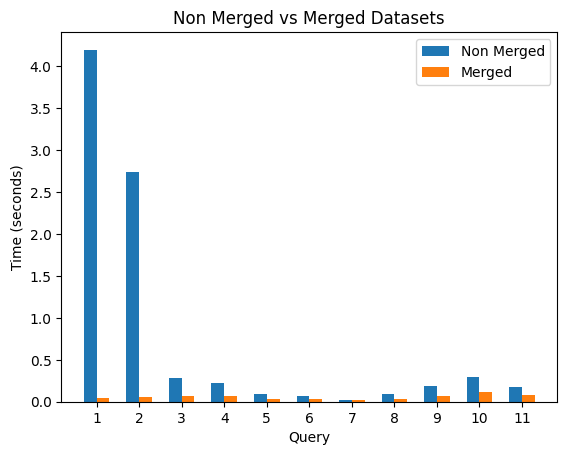

In [310]:
# Define the number of benchmarks and queries
numRuns = 5
# Run the benchmarks
merged_time_delta, non_merged_time_delta = runBenchmarks2(numRuns)
num_queries = len(merged_time_delta[0])

# Calculate the average time for each query in each benchmark
average_non_merged = [sum([non_merged_time_delta[i][j] for i in range(numRuns)])/numRuns for j in range(num_queries)]
average_merged = [sum([merged_time_delta[i][j] for i in range(numRuns)])/numRuns for j in range(num_queries)]

# Print the average times
print("Average time for non merged datasets:", average_non_merged)
print("Average time for merged datasets:", average_merged)

# Plot the results
bar_width = 0.3
index = range(len(average_merged))

plt.bar(index, average_non_merged, width=bar_width, label='Non Merged')
plt.bar([i+bar_width for i in index], average_merged, width=bar_width, label='Merged')

plt.legend()
plt.title("Non Merged vs Merged Datasets")
plt.xlabel("Query")
plt.ylabel("Time (seconds)")
plt.xticks([r + bar_width / 2 for r in range(len(average_non_merged))], range(1, len(average_merged) + 1))
plt.show()

In [26]:
def populateCouchDB():
    db_populator([("world_data", merged_df)])
    db_populator([("cost_of_living", dfCost), 
                ("world_labor_productivity", dfLabor), 
                ("world_annual_wage", dfSalary), 
                ("mental_illness", dfMental)])
    
#populateCouchDB()

In [28]:
# Define the number of benchmarks and queries
numRuns = 5
# Run the benchmarks
merged_time_delta, non_merged_time_delta = runBenchmarks(numRuns)
num_queries = len(merged_time_delta[0])

# Calculate the average time for each query in each benchmark
average_non_merged = [sum([non_merged_time_delta[i][j].total_seconds() for i in range(numRuns)])/numRuns for j in range(num_queries)]
average_merged = [sum([merged_time_delta[i][j].total_seconds() for i in range(numRuns)])/numRuns for j in range(num_queries)]

# Print the average times
print("Average time for non merged datasets:", average_non_merged)
print("Average time for merged datasets:", average_merged)

# Plot the results
bar_width = 0.4
index = range(len(average_merged))

plt.bar(index, average_non_merged, width=bar_width, label='Non Merged')
plt.bar([i+bar_width for i in index], average_merged, width=bar_width, label='Merged')

plt.legend()
plt.title("Non Merged vs Merged Datasets")
plt.xlabel("Query")
plt.ylabel("Time (miliseconds)")
plt.xticks([r + bar_width / 2 for r in range(len(average_non_merged))], range(1, len(average_merged) + 1))
plt.show()

Time to run query in the merged dataset: 0.093382 seconds
Time to run query: 1.856197 seconds
Time to run query in the unmerged dataset: 1.856197 seconds
Time to run query in the merged dataset: 0.019773 seconds
Time to run query: 1.467861 seconds
Time to run query in the unmerged dataset: 1.467861 seconds
Time to run query in the merged dataset: 0.020469 seconds
Time to run query: 1.536757 seconds
Time to run query in the unmerged dataset: 1.536757 seconds
Time to run query in the merged dataset: 0.020092 seconds
Time to run query: 1.575166 seconds
Time to run query in the unmerged dataset: 1.575166 seconds
Time to run query in the merged dataset: 0.018871 seconds
Time to run query: 1.396144 seconds
Time to run query in the unmerged dataset: 1.396144 seconds


AttributeError: 'float' object has no attribute 'total_seconds'

In [ ]:

# Lets switch it up for the elt approach
#Lets begin by creating the databases for the datasets
dfLaborELT = pd.read_csv('datasets/world_labor_productivity.csv', delimiter=',')
dfSalaryELT = pd.read_csv('datasets/world_annual_wage.csv', delimiter=',')
dfMentalELT=pd.read_csv('datasets/mental_illness.csv', delimiter=',')
dfCostELT = pd.read_csv('datasets/cost_of_living.csv', delimiter=',')

dfLaborELT

,Entity,Code,Year,Productivity: output per hour worked
0,Argentina,ARG,1972,5.770799
1,Argentina,ARG,1973,6.049992
2,Argentina,ARG,1974,6.123540
3,Argentina,ARG,1975,6.015602
4,Argentina,ARG,1976,6.029272
...,...,...,...,...
3452,Vietnam,VNM,2015,4.946606
3453,Vietnam,VNM,2016,5.156925
3454,Vietnam,VNM,2017,5.652919
3455,Vietnam,VNM,2018,5.982665


As we can see there is not a significan time diference between the queries ran in the merged vs non merged datasets, so we will opt by using the datasets separated in order to make it easier to keep the syste flowing since not all data comes at the same time and we wont need to wait for all of it to merge them

In [ ]:
#Lets add a flag to the salary dataset in order to know if it already has been converted to USD
dfSalaryELT['Converted'] = 0

#Bug its inserting the same year multiple times

#Lets insert the data into buckets
couchbaseUsername, couchbasePassword = os.getenv('COUCHBASE_USERNAME'), os.getenv('COUCHBASE_PASSWORD')


# get a reference to our cluster
auth = PasswordAuthenticator(couchbaseUsername, couchbasePassword)
cluster = Cluster.connect('couchbase://127.0.0.1', ClusterOptions(auth))

def dropAllBuckets():
    for bucket in cluster.buckets().get_all_buckets():
        cluster.buckets().drop_bucket(bucket.name)
        print(f"Bucket {bucket.name} dropped")

#dropAllBuckets()


#TODO: Verify why its inserting too many documents in the bucket

#Datasets structure:
#[(bucket_name, dataset)]
def db_populator(datasets, payloadConstructors={}, options=None):
    for i in range(len(datasets)):
        
        payloadConstructor = payloadConstructors[i]
        i = datasets[i]

        bucketName, dataset = i
        if options!=None:
            bucketSettings = CreateBucketSettings(name=options["name"], 
                                                bucket_type=options["bucket_type"], 
                                                ram_quota_mb=options["ram_quota_mb"], 
                                                max_expiry=options["max_expiry"], 
                                                compression_mode=options["compression_mode"], 
                                                conflict_resolution_type=options["conflict_resolution_type"])
        else:
            bucketSettings = CreateBucketSettings(name=bucketName, 
                                                bucket_type="couchbase", 
                                                ram_quota_mb=100, 
                                                max_expiry=0, 
                                                compression_mode="passive", 
                                                conflict_resolution_type="seqno")
            
        
        # print(f"Populating {bucketName} with {len(dataset)} documents")
        #Create the bucket to store the files
        try:
             
            cluster.buckets().create_bucket(bucketSettings, name=f'{bucketName}')
            print('Bucket created')
            cluster.wait_until_ready(timedelta(seconds=20))

        except Exception as e:
            if "Bucket with given name already exists" in str(e):
                pass

        #Lets create a new collection to store the data
        time.sleep(2)
        bucket = cluster.bucket(bucketName)
        collection = bucket.default_collection()

        #Lets store the data in the collection
        #Lets get the last id in the bucket
        k=0
        for row in dataset.iterrows():
            if payloadConstructor == {}:
                data = row[1].to_dict()
                data["_id"] = f"{k}"
            else:
                data = row[1].to_dict()
                dataToInsert = payloadConstructor.copy()
                for key in payloadConstructor:
                    dataToFind = payloadConstructor[key]
                    if dataToFind in data:
                        dataToInsert[key] = data[dataToFind]
                
                #Rever se este id é necessário visto que depois corremos o create_primary_index
                data["_id"] = f"{k}"
            collection.upsert(str(k), dataToInsert)
            k+=1

        print('Data stored')
        #Lets create the index for the data
        try:
            cluster.query_indexes().create_primary_index(bucketName)
            print('Index created')
        except Exception as e:
            if "already exists" in str(e):
                pass    


datasetsELT = [("cost_of_living_elt", dfCostELT),
               ("world_labor_productivity_elt", dfLaborELT),
                ("world_annual_wage_elt", dfSalaryELT),
                ("mental_illness_elt", dfMentalELT)]

payloadsConstructors = [
    {"Country": "Country", "Year": "Date", "CoL": "Cost of Living", "Rent Index": "Rent Index", "Cost of Living Plus Rent Index": "Cost of Living Plus Rent Index", "Groceries Index": "Groceries Index", "Restaurant Price Index": "Restaurant Price Index", "Local Purchasing Power Index": "Local Purchasing Power Index"},
    {"Country": "Entity", "Year": "Year", "Productivity": "Productivity: output per hour worked"},
    {"Country": "Country", "Year": "Time", "Salary": "Value", "Unit Code": "Unit Code", "Converted":"Converted", "Country Code": "COUNTRY"},
    {"Country": "Entity", 
     "Year": "Year",
     "DALYs from depressive disorders per 100,000 people": "DALYs from depressive disorders per 100,000 people in, both sexes aged age-standardized", 
     "DALYs from schizophrenia per 100,000 people": "DALYs from schizophrenia per 100,000 people in, both sexes aged age-standardized", 
     "DALYs from bipolar disorder per 100,000 people": "DALYs from bipolar disorder per 100,000 people in, both sexes aged age-standardized", 
     "DALYs from eating disorders per 100,000 people": "DALYs from eating disorders per 100,000 people in, both sexes aged age-standardized", 
     "DALYs from anxiety disorders per 100,000 people": "DALYs from anxiety disorders per 100,000 people in, both sexes aged age-standardized"}
]

db_populator(datasetsELT, payloadsConstructors)

{'Date': 2009, 'Country': 'Ukraine', 'Cost of Living': 35.7, 'Rent Index': 28.8, 'Cost of Living Plus Rent Index': 33.0, 'Groceries Index': 27.2, 'Restaurant Price Index': 37.1, 'Local Purchasing Power Index': 30.3, '_id': '1630'} {'Country': 'Country', 'Year': 'Date', 'CoL': 'Cost of Living', 'Rent Index': 'Rent Index', 'Cost of Living Plus Rent Index': 'Cost of Living Plus Rent Index', 'Groceries Index': 'Groceries Index', 'Restaurant Price Index': 'Restaurant Price Index', 'Local Purchasing Power Index': 'Local Purchasing Power Index'}
{'Country': 'Ukraine', 'Year': 2009, 'CoL': 35.7, 'Rent Index': 28.8, 'Cost of Living Plus Rent Index': 33.0, 'Groceries Index': 27.2, 'Restaurant Price Index': 37.1, 'Local Purchasing Power Index': 30.3}
Data stored
{'Entity': 'Vietnam', 'Code': 'VNM', 'Year': 2019, 'Productivity: output per hour worked': 6.739149, '_id': '3456'} {'Country': 'Entity', 'Year': 'Year', 'Productivity': 'Productivity: output per hour worked'}
{'Country': 'Vietnam', 'Year

In [29]:

#Probably should clean up the data here
#Lets start for the salary dataset
#Lets remove the rows that have no country code
cluster.query("DELETE FROM `world_annual_wage_elt` WHERE `Country` IS NULL")
#Lets remove the rows that have no year
cluster.query("DELETE FROM `world_annual_wage_elt` WHERE `Year` IS NULL")
#Lets remove the rows that have no salary probably can do some data engineering and interpolate them
cluster.query("DELETE FROM `world_annual_wage_elt` WHERE Salary IS NULL")
#Lets remove the rows that have no currency code
cluster.query("DELETE FROM `world_annual_wage_elt` WHERE `Unit Code` IS NULL")
#Lets set the flag to 0
cluster.query("UPDATE `world_annual_wage_elt` SET `Converted` = 0")

#TODO: With pycountry fix the countries that dont have the country code

#Lets create a new table to store the data from the currency conversion function
def exchangeELT():
    API_KEY = os.getenv("EXAAPI_KEY")
    #Probably we should start by verifying if the bucket to store the exchange rates already exists

    #Lets get all the countries currency and all the years from the datasets
    #Verify this since we dont have country codes for all the countries
    #Probably clean up the countries bucket and if any of them doesnt have coutry code remove them
    #Alter this to query the database
    countries = cluster.query("SELECT DISTINCT `Unit Code` FROM `world_annual_wage_elt`")
    years = cluster.query("SELECT DISTINCT Year FROM `world_annual_wage_elt`")


    #Lets get a string with all the country codes
    countryCodes = ",".join([row["Unit Code"] for row in countries if row != {}])

    years = [row["Year"] for row in years if row!={}]
    #Lets create a bucket to store the data
    bucketSettings = CreateBucketSettings(name="currency_exchange",
                                            bucket_type="couchbase",
                                            ram_quota_mb=100,
                                            max_expiry=0,
                                            compression_mode="passive",
                                            conflict_resolution_type="seqno")
    
    try:
        cluster.buckets().create_bucket(bucketSettings, name="currency_exchange")
        print('Bucket created')
        cluster.wait_until_ready(timedelta(seconds=20))
        #Create the primary index
        cluster.query_indexes().create_primary_index("currency_exchange")
    
    except Exception as e:
        if "Bucket with given name already exists" in str(e):
             pass
    
    bucket = cluster.bucket("currency_exchange")
    collection = bucket.default_collection()

    i=0
    
    for year in years:
        apiUrl = f"http://api.exchangeratesapi.io/v1/{str(year)}-12-12?access_key={API_KEY}&symbols=USD,{countryCodes}"
        response = requests.get(apiUrl)
        if response.status_code !=200:
            break
        exchangeRates = response.json()
        if exchangeRates['success']:
            dataToInsert = exchangeRates['rates']
            dataToInsert["Year"] = year
            #TODO: FIX Exchange rate = USD*exchangeRates['rates'][countryCode]
            collection.upsert(str(i), dataToInsert)
    
        print("Inserted exchange rates for year "+str(year))
        i+=1
    print("Exchanged successfully")
        

# exchangeELT()

In [31]:
#Lets use the exchanged data currencies to alter the values of the salary in the wage bucket
#Lets create a function in the database to do this
#COUCHBASE DOESNT HAVE TRIGGERS PROBABLY WILL HAVE TO CREATE A PROCESS THAT LISTENS FOR UPDATES ON THE CURRENCY EXCHANGE DATBASE
#AND THEN ALTER THE VALUES IN THE WAGE BUCKET
#Lets create a function to do this
#Query the wage database and get the salary collumn and the flag collumn 
#if the flag is not set then query the currency exchange database and alter the salary value and alter the flag value

def updateSalaries():
    wageQuery = f"SELECT Salary, Converted, `Unit Code`, Year FROM `world_annual_wage_elt`"
    exchangeQuery = f"SELECT * FROM `currency_exchange` WHERE Year = $1"
    updateQuery = f"UPDATE `world_annual_wage_elt` SET Salary = $1, Converted = 1 WHERE Salary = $2 AND `Unit Code` = $3 AND Year = $4 AND Converted = 0"
    wageQueryResult = cluster.query(wageQuery)


    for row in wageQueryResult:
        if row!={} and row['Converted'] == 0:
            exchangeQueryResult = cluster.query(exchangeQuery, row['Year'], row['Unit Code'])

            Unit = row['Unit Code']
            
            eResult = None

            for eRow in exchangeQueryResult:
                eResult = eRow
                break

            if  Unit is not None and eResult is not None and Unit in eResult["currency_exchange"] :
                newSalary = row['Salary'] / eResult['currency_exchange'][Unit]
                previousSalary = row["Salary"]
                Year = row["Year"]
                updateQuery = f"UPDATE `world_annual_wage_elt` SET Salary = {newSalary}, Converted = 1 WHERE Salary = {previousSalary} AND `Unit Code` = \"{Unit}\" AND Year = {Year} AND Converted = 0"
                #The update query has some delay
                cluster.query(updateQuery,QueryOptions(metrics=True))
    
    print("Salaries converted to USD successfully")

#updateSalaries()

In [32]:
def dropAllBuckets():
    for bucket in cluster.buckets().get_all_buckets():
        cluster.buckets().drop_bucket(bucket.name)
        print(f"Dropped bucket {bucket.name}")

In [7]:
class finalSolution:
    def __init__(self) -> None:
        pass
        
    def extract(self):
        #DATASETS ESCOLHIDOS

        self.dfLabor = pd.read_csv('datasets/world_labor_productivity.csv', delimiter=',')
        #To change for the original dataset
        self.dfSalary = pd.read_csv('datasets/world_annual_wage.csv', delimiter=',')
        self.dfExchangeRates = pd.read_csv('datasets/exchange_rates.csv', delimiter=',')
        self.dfMental=pd.read_csv('datasets/mental_illness.csv', delimiter=',')
        self.dfCost = pd.read_csv('datasets/cost_of_living.csv', delimiter=',')
                

    def transform(self):
        self.dfMental.rename(columns={'Entity':'Country'}, inplace=True)
        self.dfMental.rename(columns={'DALYs from depressive disorders per 100,000 people in, both sexes aged age-standardized':'DALYs from depressive disorders per 100,000 people'}, inplace=True)
        self.dfMental.rename(columns={'DALYs from bipolar disorder per 100,000 people in, both sexes aged age-standardized':'DALYs from bipolar disorder per 100,000 people'}, inplace=True)
        self.dfMental.rename(columns={'DALYs from schizophrenia per 100,000 people in, both sexes aged age-standardized':'DALYs from schizophrenia per 100,000 people'}, inplace=True)
        self.dfMental.rename(columns={'DALYs from eating disorders per 100,000 people in, both sexes aged age-standardized':'DALYs from eating disorders per 100,000 people'}, inplace=True)
        self.dfMental.rename(columns={'DALYs from anxiety disorders per 100,000 people in, both sexes aged age-standardized':'DALYs from anxiety disorders per 100,000 people'}, inplace=True)

        self.dfLabor.rename(columns={"Entity": "Country"}, inplace=True)
        self.dfLabor.drop(columns=['Code'], inplace=True)
        self.dfLabor.rename(columns={'Productivity: output per hour worked':'Productivity'}, inplace=True)

        
        # #COUNTRY,"Country","SERIES","Series","TIME","Time","Unit Code","Unit","PowerCode Code","PowerCode","Reference Period Code","Reference Period","Value","Flag Codes","Flags"
        self.dfSalary.drop(columns=[ 'COUNTRY' , "Flag Codes", "Flags", "SERIES", "Series", "Unit", "PowerCode", "PowerCode Code","Reference Period Code", "Reference Period"], inplace=True)
        self.dfSalary.rename(columns={'Value':'Salary'}, inplace=True)
        self.dfSalary.rename(columns={'PowerCode':'Unit Code'}, inplace=True)
        self.dfSalary.rename(columns={'Time':'Year'}, inplace=True)
        self.dfSalary.drop(columns=[ 'TIME' ], inplace=True)
        #Lets get all countries that have no unit code
        countriesWithoutUnitCode = self.dfSalary[self.dfSalary['Unit Code'].isna()]["Country"].unique()
        #Drop the countries without unit code
        self.dfSalary = self.dfSalary[~self.dfSalary['Country'].isin(countriesWithoutUnitCode)]
        self.dfSalary = self.dfSalary.dropna(subset=['Year'])
        self.dfSalary = self.dfSalary.dropna(subset=['Salary'])
        self.dfSalary = self.dfSalary.dropna(subset=['Unit Code'])
        self.dfSalary = self.dfSalary.dropna(subset=['Country'])

        self.dfCost.rename(columns={'Date':'Year'}, inplace=True)
        self.dfCost.rename(columns={'Cost of Living':'CoL'}, inplace=True)

        #Lets get the countries without country code
        #Using pycountry to get the country code
        self.getCountryCodes(self.dfCost)
        


        #Lets ommit this part since the api is paid and we dont need to spend more credits on this
        # self.getExchangeRates()
        self.exchange()

        #Lets merge the datasets
        self.merged_df = pd.merge(self.dfCost, self.dfLabor, on=['Country', 'Year'], how='inner')
        self.merged_df = pd.merge(self.merged_df, self.dfSalary, on=['Country', 'Year'], how='inner')
        self.merged_df = pd.merge(self.merged_df, self.dfMental, on=['Country', 'Year'], how='inner')
        

    def getCountryCodes(self, dataset):
        #Lets get the countries that dont have country codes
        countriesWithoutCountryCode = dataset[dataset['Country'].isna()]["Country"].unique()
        #Using pycountry to get the country code
        for country in countriesWithoutCountryCode:
            try:
                print(country)
                #Lets get the countries iso2 code and cross reference with a webpage that has 
                country_code = pc.countries.get(name=country).alpha_3
                print(country_code)
            except:
                pass


    def load(self):
                #Should we merge the collumns Rent index and Groceries index and rename it to Basic Needs Index and the Restaurant Index to Leisure Index
        self.couchbaseUsername, self.couchbasePassword = os.getenv('COUCHBASE_USERNAME'), os.getenv('COUCHBASE_PASSWORD')


        # get a reference to our cluster
        auth = PasswordAuthenticator(self.couchbaseUsername, self.couchbasePassword)
        self.cluster = Cluster.connect('couchbase://127.0.0.1', ClusterOptions(auth))
        
        self.db_populator([("world_data", self.merged_df)])
        


    #Datasets structure:
    #[(bucket_name, dataset)]
    def db_populator(self, datasets, options=None):
        for i in datasets:
            bucketName, dataset = i
            if options!=None:
                bucketSettings = CreateBucketSettings(name=options["name"], 
                                                    bucket_type=options["bucket_type"], 
                                                    ram_quota_mb=options["ram_quota_mb"], 
                                                    max_expiry=options["max_expiry"], 
                                                    compression_mode=options["compression_mode"], 
                                                    conflict_resolution_type=options["conflict_resolution_type"])
            else:
                bucketSettings = CreateBucketSettings(name=bucketName, 
                                                    bucket_type="couchbase", 
                                                    ram_quota_mb=100, 
                                                    max_expiry=0, 
                                                    compression_mode="passive", 
                                                    conflict_resolution_type="seqno")
                
            
            print(f"Populating {bucketName} with {len(dataset)} documents")
            #Create the bucket to store the files
            try:
                
                self.cluster.buckets().create_bucket(bucketSettings, name=f'{bucketName}')
                print('Bucket created')
                self.cluster.wait_until_ready(timedelta(seconds=20))
                #TODO: Rever isto, por vezes parte visto que pode demorar mais a criar o bucket

            except Exception as e:
                if "Bucket with given name already exists" in str(e):
                    pass

            time.sleep(2)
            #Lets create a new collection to store the data
            bucket = self.cluster.bucket(bucketName)
            collection = bucket.default_collection()

            #Lets store the data in the collection
            #Lets store the data in the collection
            #Lets get the last id in the bucket
            i=0
            for row in dataset.iterrows():
                data = row[1].to_dict()
                data["Year"] = f"30/12/{data['Year']}"
                #Rever se este id é necessário visto que depois corremos o create_primary_index
                collection.upsert(str(i),data)
                i+=1

            print('Data stored')
            #Lets create the index for the data
            try:
                self.cluster.query_indexes().create_primary_index(bucketName)
                print('Index created')
            except Exception as e:
                if "already exists" in str(e):
                    pass    


    def getExchangeRates(self):
        API_KEY = os.getenv("EXAPI_KEY")

        # Lets use the Unit Code to get the exchange rates for each country
        # Lets collect all the Unit Codes for the countries per year
        unitCodesPerYear = {}
        for year in self.dfSalary['Year'].unique():
            unitCodesPerYear[year] = self.dfSalary[self.dfSalary['Year'] == year]['Unit Code'].unique().tolist()


        #Lets create a new dataset to store this information
        dfExchangeRates = pd.DataFrame(columns=['Year', 'Unit Code', 'Exchange Rate'])

        for year in unitCodesPerYear:
            
            unitCodes = ",".join([unit for unit in unitCodesPerYear[year] if str(unit)!="nan"])
            apiUrl = f"http://api.exchangeratesapi.io/v1/{str(year)}-12-12?access_key={API_KEY}&symbols=USD,{unitCodes}"
            response = requests.get(apiUrl)
            if response.status_code !=200:
                break
            exchangeRates = response.json()
            
            for index, row in self.dfSalary[self.dfSalary['Year'] == year].iterrows():
                unitCode = row['Unit Code']
                if unitCode in exchangeRates['rates']:
                    exchangeRate = exchangeRates['rates'][unitCode]
                    dfExchangeRates = pd.concat([dfExchangeRates, pd.DataFrame({'Year': [year], 'Unit Code': [unitCode], 'Exchange Rate': [exchangeRate]})], ignore_index=True)
                else:
                    latest_exchange_rate = None
                    for code, rate in exchangeRates['rates'].items():
                        if code in unitCodesPerYear[year]:
                            latest_exchange_rate = rate
                            break
                    if latest_exchange_rate is not None:
                        dfExchangeRates = pd.concat([dfExchangeRates, pd.DataFrame({'Year': [year], 'Unit Code': [unitCode], 'Exchange Rate': [latest_exchange_rate]})], ignore_index=True)
        
        #Lets save the dataframe with the exchange rates 
        dfExchangeRates.to_csv('datasets/exchange_rates.csv', index=False)
        print("Exchanged successfully")

    def exchange(self):
        #Verify if this makes the changes in the saved csv for this dataset
        for row in self.dfSalary.iterrows():
            index, row = row
            entity = row['Country']
            unitCode = row['Unit Code']
            salary = row['Salary']
            year = row['Year']
            exchangeRate = self.dfExchangeRates[(self.dfExchangeRates['Year'] == year) & (self.dfExchangeRates['Unit Code'] == unitCode)]['Exchange Rate']
            if len(exchangeRate) > 0:
                exchangeRate = exchangeRate.iloc[0]
                salaryInUSD = salary / exchangeRate
                self.dfSalary.at[index, 'Salary'] = salaryInUSD
                self.dfSalary.at[index, 'Exchange Rate'] = float(exchangeRate)
            else:
                print(f"Exchange rate not found for {entity} in {year}")



    def dropAllBuckets(self):
        for bucket in self.cluster.buckets().get_all_buckets():
            if bucket.name.endswith("_etl"):
                self.cluster.buckets().drop_bucket(bucket.name)
                print(f"Bucket {bucket.name} dropped")

finalSolution = finalSolution()
finalSolution.extract()
finalSolution.transform()
finalSolution.load()


Populating world_data with 1002 documents
Data stored
